<a href="https://colab.research.google.com/github/gracieleo/projetoIntegradorVII-sistemaIoT-energiaEletrica/blob/master/Projeto_Integrador_VII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sistema IoT para monitoramento de consumo de energia elétrica** 💡

Esse notebook tem como objetivo, fazer uma análise dos dados de medição de energia elétrica coletados no mês de junho/2022, como parte da pesquisa para o Projeto Integrador VII da [UNIVESP](https://univesp.br/).<br/>
A base de dados em formato .csv foi lida através do módulo RTC DS1307 e sensores (corrente e tensão) conectados a plataforma Arduíno.<br/>
Os dados foram lidos e armazenados no [Clever Cloud](https://www.clever-cloud.com/) (servidor de banco de dados em nuvem) com o banco de dados [MySQL](https://www.mysql.com/).


**Visualizando a planilha com os dados coletados a partir da leitura de uma banca de trabalho (com alguns equipamentos conectados) chamada de Desktop**   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [ ]:
leitura_energia = pd.read_csv('sample_data/ENERGIA.csv', sep= ';')
leitura_energia

,EQUIPAMENTO,CORRENTE,TENSAO,POTENCIA,DATA_HORA
0,DESKTOP,1.1,111.7,128.3,28/06/2022 02:47
1,DESKTOP,1.1,107.2,121.4,28/06/2022 02:47
2,DESKTOP,1.2,111.1,134.2,28/06/2022 02:48
3,DESKTOP,1.2,112.3,137.9,28/06/2022 02:48
4,DESKTOP,1.1,109.9,124.4,28/06/2022 02:48
...,...,...,...,...,...
443,DESKTOP,1.1,98.6,108.6,30/06/2022 23:48
444,DESKTOP,1.1,95.9,107.1,30/06/2022 23:49
445,DESKTOP,1.1,100.1,106.2,30/06/2022 23:49
446,DESKTOP,1.1,95.4,103.2,30/06/2022 23:49


**Plotando o grafico com os dados de leitura de potencia dos aparelhos que estão na bancada de trabalho denominada como Desktop**

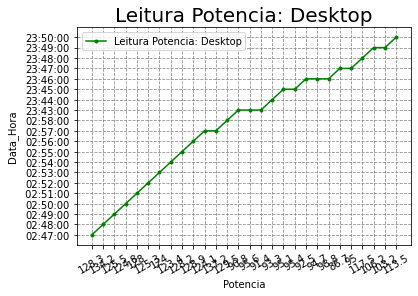

<Figure size 1440x1440 with 0 Axes>

In [ ]:
x = []
y = []
with open('sample_data/ENERGIA.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=';')
    for row in lines:
        x.append(row[3])
        y.append((row[4]))
  
plt.plot(x, y, color = 'g', linestyle = 'solid',
         marker = '.',label = "Leitura Potencia: Desktop")

plt.xticks(rotation = 30)
plt.xlabel('Potencia')
plt.ylabel('Data_Hora')
plt.title('Leitura Potencia: Desktop', fontsize = 20)
plt.grid(c='gray', alpha=0.9, linestyle='--')
plt.legend()
plt.figure(figsize=(20,20))
plt.show()

Os dados de cálculo e valores foram consultados na [CPFL](https://www.cpfl.com.br/) (Companhia Piratininga de Força e Luz) com atuação em 4 estados, na distribuição de energia: São Paulo, Rio Grande do Sul, Paraná e Minas Gerais.

### ⛳ **Entendendo as bandeiras tarifárias**

*   Bandeira **verde** : A tarifa não tem acréscimo.

*   Bandeira **amarela**: A tarifa tem um acréscimo de R$ 1,34 a cada 100 kWh consumidos.

*   Bandeira **vermelha Patamar 1**: A tarifa tem um acréscimo de R$ 4,16 a cada 100 kWh consumidos.

*   Bandeira **vermelha Patamar 2**: A tarifa tem um acréscimo de R$ 9,49 a cada 100 kWh consumidos.

*   Bandeira **escassez hídrica**: Tarifa tem um acréscimo de 14,20 a cada 100Kwh consumidos (exceto para clientes baixa renda).


> 



Fonte consulta: https://www.cpfl.com.br/ajuda#cpfl_ca_1891


---



### 💸 **Como o valor da conta de luz é calculada:**

***Tributos***
- PIS - Programa de Integração Social
- COFINS - Contribuição para o Financiamento da Seguridade Social
- ICMS - Imposto sobre Circulação de Mercadorias e Serviços
- CIP - Contribuição para Custeio do Serviço de Iluminação Pública



***Alíquotas***

ICMS
- 0%  caso o consumo de energia seja de até 90 kWh.
- 12% caso o consumo de energia seja entre 91 kWh e 200 kWh.
- 25% caso o consumo de energia seja acima de 200 kWh.

PIS - 0,96%

COFINS - 4,46%

CIP - contribuição e a fórmula de cálculo são disciplinadas por Lei Municipal 





Fonte consulta:https://servicosonline.cpfl.com.br/agenciacontingencia/tributos.aspx



---



Com base na medição do aparelho Desktop, será realizado uma simulação de cálculo de consumo em reais de acordo com os dados da distribuidora de energia.


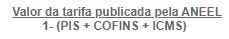

***Exemplo para junho de 2022***

* 1º passo: Incluir na tarifa fixada por kWh, os tributos PIS, COFINS e ICMS. 

  R$ 1,04 /1-(0.0096 + 0.0446 + 0.25)
  
   R$ 1,49 kWh

* 2º passo:Multiplicar o valor do kWh com tributos inclusos pela quantidade kWh consumida (usaremos uma média).

  R$ 1,49 X 128 = 190,72

* 3º passo: Incluir ao valor calculado a Contribuição de Iluminação Pública (CIP).

  R$ 190,72 + 2,80 = 193,52

 

 